In [46]:
import json
import numpy as np
import matplotlib.pyplot as plt

def open_dataset(json_path):
    with open(json_path, "r") as f:
        info = json.load(f)

    return info

def explore_dataset(info, get_novel_stats=False):

    n_categories = len(info["categories"])
    n_images = len(info["images"])
    n_annotations = len(info["annotations"])

    n_effective_images = len(np.unique([ann["image_id"] for ann in info["annotations"]]))

    avg_ann_per_img = n_annotations/n_effective_images

    img_width = np.array([img["width"] for img in info["images"]])
    avg_width, std_width = img_width.mean(), img_width.std()

    img_height = np.array([img["height"] for img in info["images"]])
    avg_height, std_height = img_height.mean(), img_height.std()

    ann_area = np.array([ann["area"] for ann in info["annotations"]])
    avg_area, std_area = ann_area.mean(), ann_area.std()

    categories = np.array([ann["category_id"] for ann in info["annotations"]])
    cat_count = np.unique(categories, return_counts=True)

    n_effective_categories = len(cat_count[0])
    sorted_counts = sorted(cat_count[1])

    return_dict = {
        "n_categories":n_categories, #
        "n_effective_categories":n_effective_categories,  #
        "n_images":n_images,  #
        "n_effective_images":n_effective_images,  #
        "n_annotations":n_annotations, #
        "avg_ann_per_img":avg_ann_per_img,  # 
        "avg_width":avg_width, 
        "std_width":std_width,
        "avg_height":avg_height, 
        "std_height":std_height, 
        "avg_area":avg_area, 
        "std_area":std_area, 
        "sorted_counts":sorted_counts,
        "img_width":img_width,
        "img_height":img_height,
        "ann_area":ann_area
        }
    
    if get_novel_stats:
        novel_cats = []
        for t in sorted(zip(cat_count[1], cat_count[0])):
            
            if 100 <= t[0] <= 115:
                novel_cats.append(t[1])

        n_effective_categories = len(novel_cats)
        novel_ann = [ann for ann in info["annotations"] if (ann["category_id"] in novel_cats)]

        n_annotations = len(novel_ann)

        sorted_counts = sorted(np.unique([ann["category_id"] for ann in novel_ann], return_counts=True)[1])

        novel_img_ids = np.unique([ann["image_id"] for ann in novel_ann])
        novel_imgs = [img for img in info["images"] if (img["id"] in novel_img_ids)]

        n_effective_images = len(novel_img_ids)

        avg_ann_per_img = n_annotations/n_effective_images

        img_width = np.array([img["width"] for img in novel_imgs])
        avg_width, std_width = img_width.mean(), img_width.std()

        img_height = np.array([img["height"] for img in novel_imgs])
        avg_height, std_height = img_height.mean(), img_height.std()

        ann_area = np.array([ann["area"] for ann in novel_ann])
        avg_area, std_area = ann_area.mean(), ann_area.std()

        return_dict_novel = {
            "n_effective_categories":n_effective_categories,  #
            "n_effective_images":n_effective_images,  #
            "n_annotations":n_annotations, #
            "avg_ann_per_img":avg_ann_per_img,  # 
            "avg_width":avg_width, 
            "std_width":std_width,
            "avg_height":avg_height, 
            "std_height":std_height, 
            "avg_area":avg_area, 
            "std_area":std_area, 
            "sorted_counts":sorted_counts,
            "img_width":img_width,
            "img_height":img_height,
            "ann_area":ann_area
            }
        
        return return_dict, return_dict_novel
    
    return return_dict

def explore_dataset_from_path(json_path, get_novel_stats=False):
    info = open_dataset(json_path)
    return explore_dataset(info, get_novel_stats=get_novel_stats)
    

In [17]:
full = open_dataset("/home/franco4w/github/FSOD_CenterNet/data/full_2017_bboxes.json")
print(full["annotations"][0])
print(full["images"][0])

{'area': 41823.5, 'iscrowd': 0, 'image_id': 0, 'bbox': [184, 139, 359, 233], 'category_id': 0, 'id': 0}
{'license': '3', 'file_name': 'train_val_images/Mammalia/Marmota flaviventris/6e95e4ae165c3bd2b74490d0d655cc2d.jpg', 'rights_holder': 'R.J. Adams', 'height': 532, 'width': 800, 'id': 0}


In [18]:
base_train_dset = open_dataset("/home/franco4w/github/FSOD_CenterNet/data/base_train.json")
base_val_dset = open_dataset("/home/franco4w/github/FSOD_CenterNet/data/base_val.json") 
base_test_dset = open_dataset("/home/franco4w/github/FSOD_CenterNet/data/base_test.json")

base_full_dset = {}

base_full_dset["images"] = base_train_dset["images"].copy() + base_val_dset["images"].copy() + base_test_dset["images"].copy()
base_full_dset["categories"] = base_train_dset["categories"].copy() + base_val_dset["categories"].copy() + base_test_dset["categories"].copy()
base_full_dset["annotations"] = base_train_dset["annotations"].copy() + base_val_dset["annotations"].copy() + base_test_dset["annotations"].copy()

print(len(base_full_dset["images"]))
print(len(base_train_dset["images"]))
print(len(base_val_dset["images"]))
print(len(base_test_dset["images"]))

325549
260150
32233
33166


46883.626131400255 50432.66660628654 6.0 320000.0


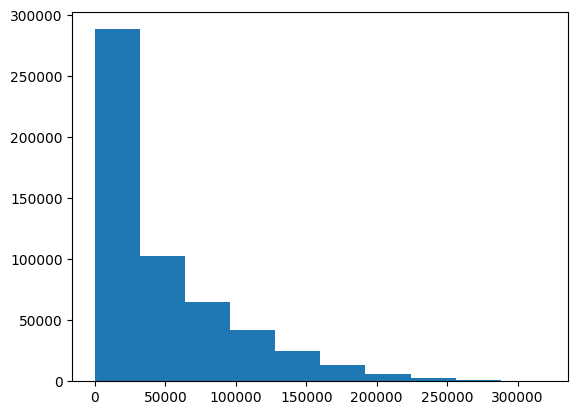

In [47]:
full, novel = explore_dataset_from_path("/home/franco4w/github/FSOD_CenterNet/data/full_2017_bboxes.json", get_novel_stats=True)

42254.54684506857 47864.4078130537 6.0 319600.0


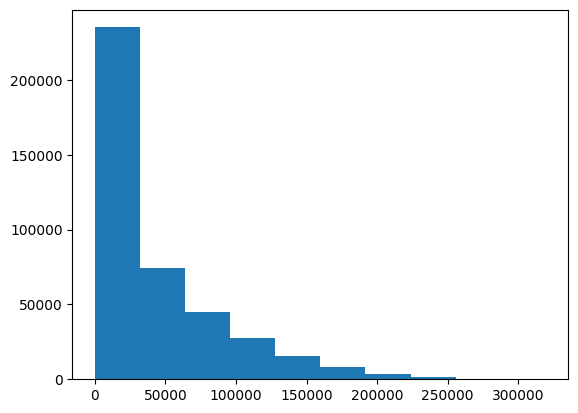

42305.308351076914 47888.19025388088 6.0 319600.0


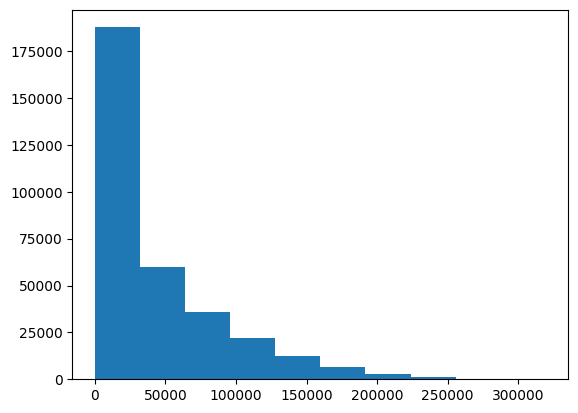

41957.89800543971 47807.15410547173 20.0 317602.5


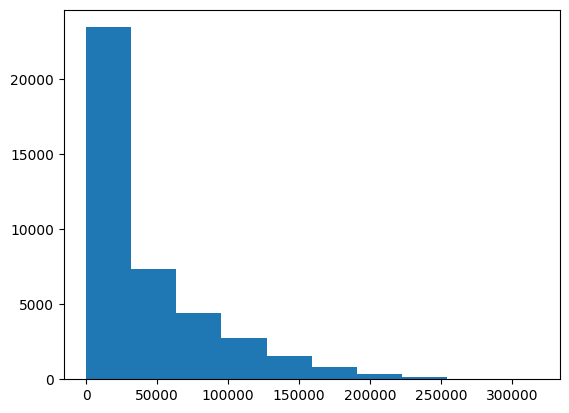

42144.47484524748 47731.62026692026 20.0 315614.0


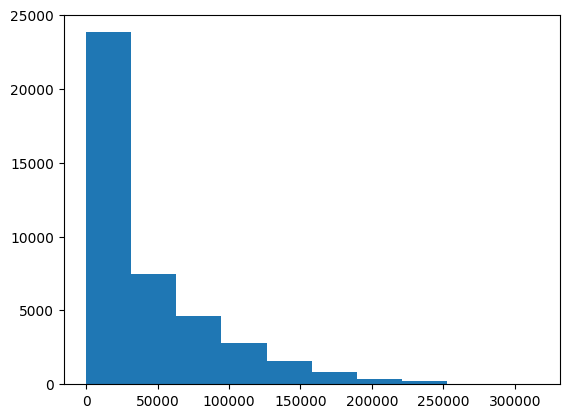

In [48]:
base_full = explore_dataset(base_full_dset)
base_train = explore_dataset_from_path("/home/franco4w/github/FSOD_CenterNet/data/base_train.json") 
base_val = explore_dataset_from_path("/home/franco4w/github/FSOD_CenterNet/data/base_val.json") 
base_test = explore_dataset_from_path("/home/franco4w/github/FSOD_CenterNet/data/base_test.json") 

In [49]:
dsets = [full, base_full, novel]
comparison = [base_full, base_train, base_val, base_test]

In [104]:
cat = "sorted_counts"
for_plot = []
labels = ["Full", "Base", "Novel"]
for d in dsets:
    print(d[cat] if cat in d.keys() else "not present")
    if cat in d.keys():
        for_plot.append(d[cat])


[1, 5, 6, 6, 7, 8, 10, 10, 13, 13, 13, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 2

In [140]:
i=2
print(min(for_plot[i]))
print(max(for_plot[i]))

100
115


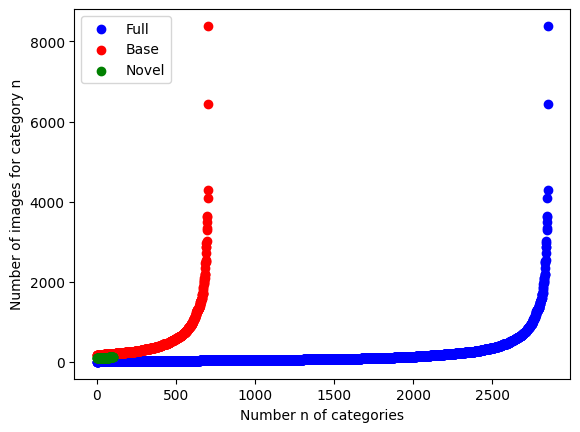

In [137]:
# plt.boxplot(for_plot, labels=labels, sym=".")
colors = ["b", "red", "g"]
for i in range(len(for_plot)):
    plt.scatter(range(len(for_plot[i])), for_plot[i], color=colors[i])

plt.legend(labels)
plt.xlabel("Number n of categories")
plt.ylabel("Number of images for category n")

# plt.hlines([100, 115, 173], xmin=0, xmax=2*len(for_plot[2]))
plt.show()

In [95]:
for_plot = []
labels = ["Base", "B train", "B val", "B test"]
print("\nBASE")
for d in comparison:
    print(d[cat] if cat in d.keys() else "")
    if cat in d.keys():
        for_plot.append(d[cat])


BASE
[41823.5 54032.  12672.5 ... 10750.  10718.5 11072.5]
[41823.5 54032.  12672.5 ...   546.    828.    587.5]
[10062.  62418.  20979.  ... 49400.  44832.5  4350. ]
[68557.5 90092.   3370.5 ... 10750.  10718.5 11072.5]


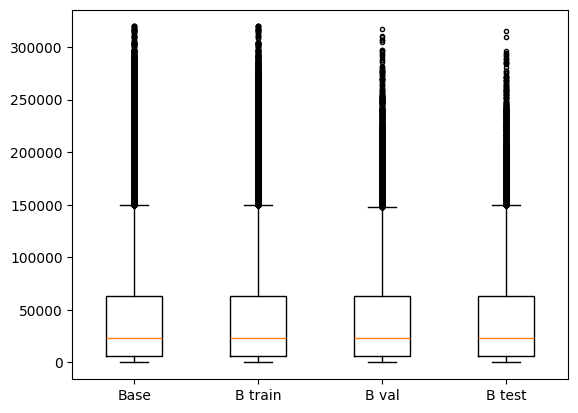

In [96]:
plt.boxplot(for_plot, labels=labels, sym=".")
plt.show()

In [ ]:
full["images"][0]


In [16]:
categories = np.array([ann["category_id"] for ann in full["annotations"]])
cat_count = np.unique(categories, return_counts=True)

In [21]:
print(len(full["categories"]))
print(len(categories))
len(cat_count[0])

5089
544900


2854

In [32]:
sorted_counts = sorted(cat_count[1])

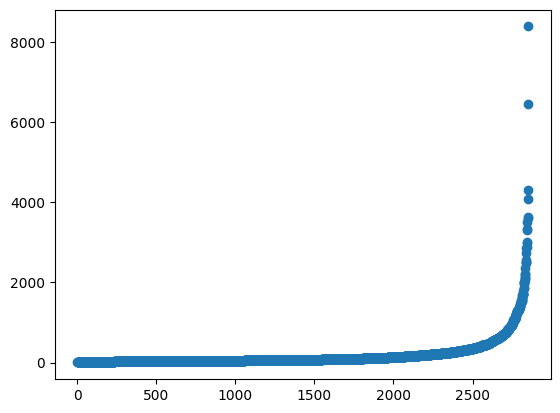

In [33]:
import matplotlib.pyplot as plt
plt.scatter(range(len(sorted_counts)),sorted_counts)